# # (Banking Domain - Credit Risk Scoring):

### * importing the libraries *

In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## (1). Importing the credit risk data-

In [3]:
credit_risk_scoring = pd.read_csv(r"C:\Data\credit_risk_dataset_ML\credit_risk_dataset.csv")

credit_risk_scoring.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
credit_risk_scoring = credit_risk_scoring[['person_age','person_income','person_home_ownership','person_emp_length',
                                         'loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income',
                                         'cb_person_default_on_file','cb_person_cred_hist_length','loan_status']]

credit_risk_scoring = credit_risk_scoring.rename({'loan_amnt':'loan_amount','loan_int_rate':'interest_rate',
                              'loan_percent_income':'percent_income','cb_person_default_on_file':'historical_default',
                                          'cb_person_cred_hist_length':'Credit_history_length'}, axis=1)
credit_risk_scoring

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amount,interest_rate,percent_income,historical_default,Credit_history_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [5]:
type(credit_risk_scoring)

credit_risk_scoring.info()

credit_risk_scoring.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             32581 non-null  int64  
 1   person_income          32581 non-null  int64  
 2   person_home_ownership  32581 non-null  object 
 3   person_emp_length      31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amount            32581 non-null  int64  
 7   interest_rate          29465 non-null  float64
 8   percent_income         32581 non-null  float64
 9   historical_default     32581 non-null  object 
 10  Credit_history_length  32581 non-null  int64  
 11  loan_status            32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amount',
       'interest_rate', 'percent_income', 'historical_default',
       'Credit_history_length', 'loan_status'],
      dtype='object')

## (2). Data cleaning-

### (a). droping duplicates

In [6]:
credit_risk_scoring.duplicated().sum()

credit_risk_scoring.drop_duplicates(keep='first', inplace=True)

credit_risk_scoring.duplicated().sum()

0

### (b). fixing null values

In [7]:
credit_risk_scoring.isnull().sum()

person_age                  0
person_income               0
person_home_ownership       0
person_emp_length         887
loan_intent                 0
loan_grade                  0
loan_amount                 0
interest_rate            3095
percent_income              0
historical_default          0
Credit_history_length       0
loan_status                 0
dtype: int64

In [8]:
credit_risk_scoring.person_emp_length.median()

credit_risk_scoring.person_emp_length.replace(np.nan,credit_risk_scoring.person_emp_length.median(), inplace=True)

credit_risk_scoring.interest_rate.median()

credit_risk_scoring.interest_rate.replace(np.nan,credit_risk_scoring.interest_rate.median(), inplace=True)

credit_risk_scoring.isna().sum()

person_age               0
person_income            0
person_home_ownership    0
person_emp_length        0
loan_intent              0
loan_grade               0
loan_amount              0
interest_rate            0
percent_income           0
historical_default       0
Credit_history_length    0
loan_status              0
dtype: int64

In [9]:
credit_risk_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             32416 non-null  int64  
 1   person_income          32416 non-null  int64  
 2   person_home_ownership  32416 non-null  object 
 3   person_emp_length      32416 non-null  float64
 4   loan_intent            32416 non-null  object 
 5   loan_grade             32416 non-null  object 
 6   loan_amount            32416 non-null  int64  
 7   interest_rate          32416 non-null  float64
 8   percent_income         32416 non-null  float64
 9   historical_default     32416 non-null  object 
 10  Credit_history_length  32416 non-null  int64  
 11  loan_status            32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


### (c). outliers detection

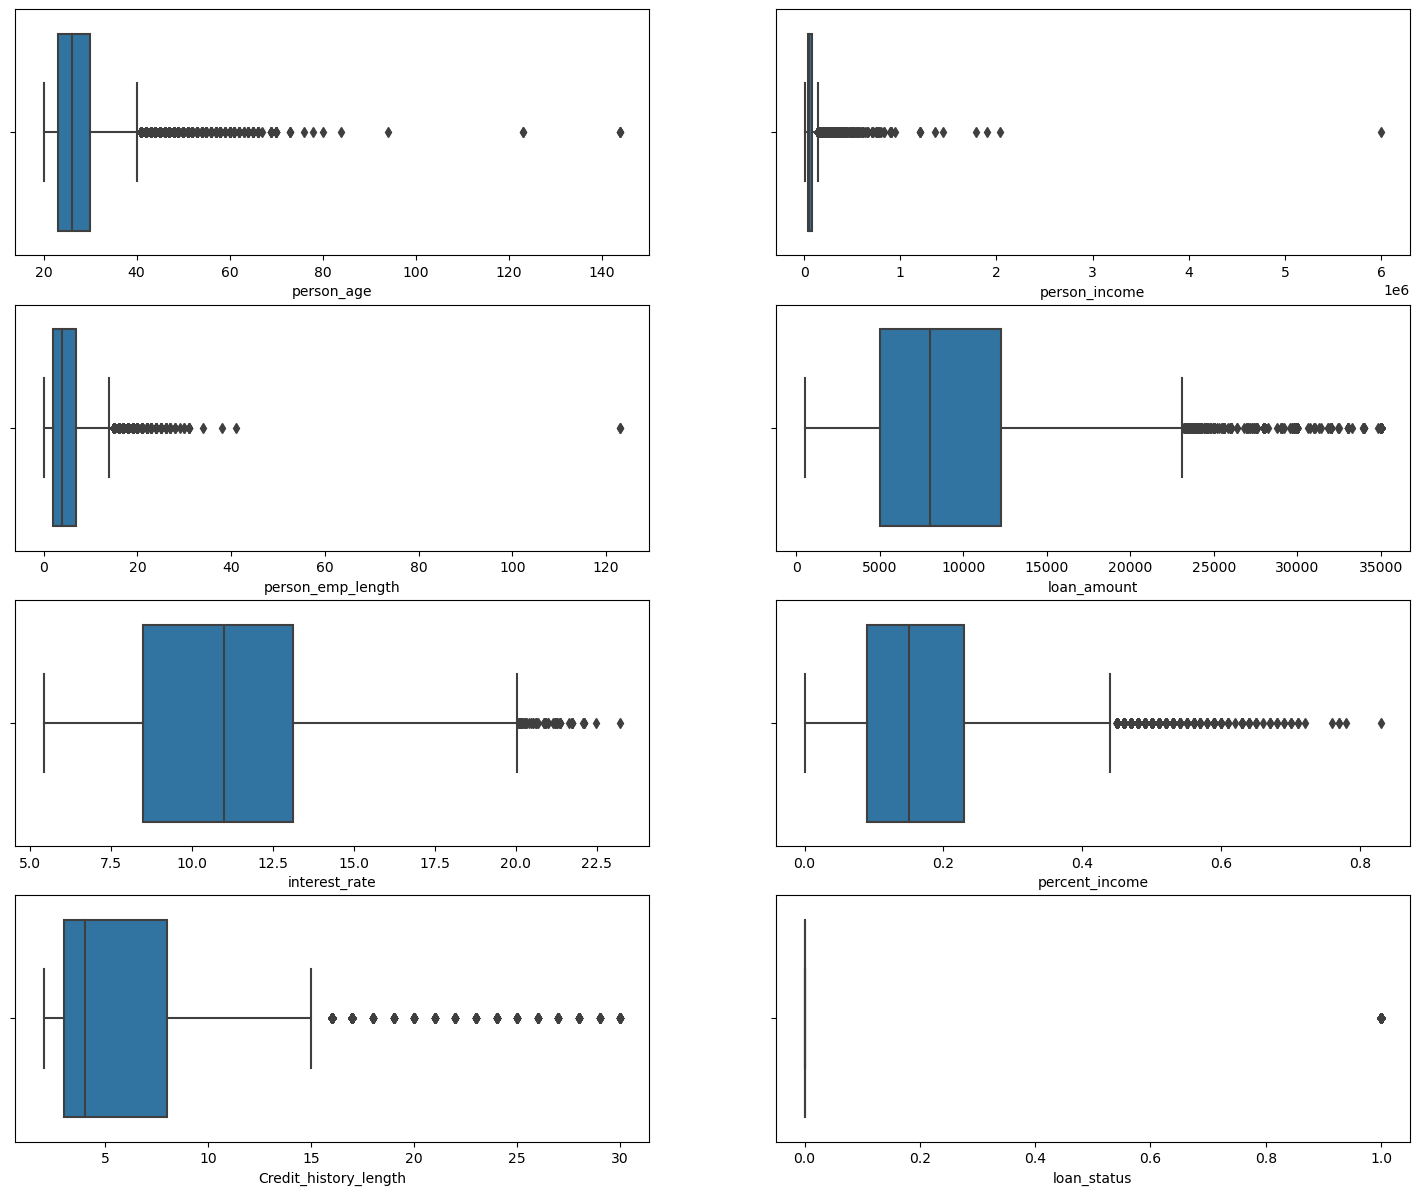

In [10]:
plt.figure(dpi=100, figsize=(18,15))

plt.subplot(421)
sns.boxplot(data=credit_risk_scoring,x='person_age')
            
plt.subplot(422)
sns.boxplot(data=credit_risk_scoring,x='person_income')
            
plt.subplot(423)
sns.boxplot(data=credit_risk_scoring,x='person_emp_length')
            
plt.subplot(424)
sns.boxplot(data=credit_risk_scoring,x='loan_amount')

plt.subplot(425)
sns.boxplot(data=credit_risk_scoring,x='interest_rate')

plt.subplot(426)
sns.boxplot(data=credit_risk_scoring,x='percent_income')

plt.subplot(427)
sns.boxplot(data=credit_risk_scoring,x='Credit_history_length')

plt.subplot(428)
sns.boxplot(data=credit_risk_scoring,x='loan_status');

### (d). removing outliers

In [11]:
credit_risk_scoring.shape

(32416, 12)

23.0 26.0 30.0
7.0
40.5
12.5


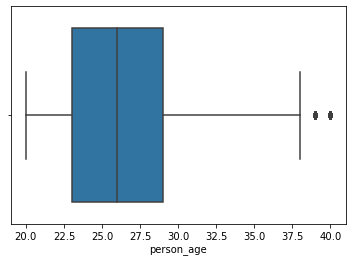

In [12]:
Q1,Q2,Q3 =tuple(credit_risk_scoring.person_age.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=credit_risk_scoring[(credit_risk_scoring.person_age>UL)].index
credit_risk_scoring=credit_risk_scoring.drop(drop_index,axis=0)
sns.boxplot(data=credit_risk_scoring,x='person_age');

38400.0 55000.0 78750.0
40350.0
139275.0
-22125.0


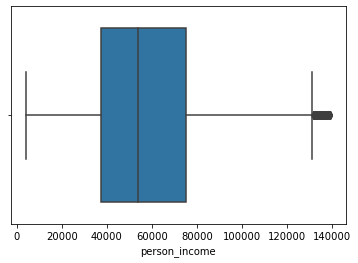

In [13]:
Q1,Q2,Q3 =tuple(credit_risk_scoring.person_income.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=credit_risk_scoring[(credit_risk_scoring.person_income>UL)].index
credit_risk_scoring=credit_risk_scoring.drop(drop_index,axis=0)
sns.boxplot(data=credit_risk_scoring,x='person_income');

2.0 4.0 7.0
5.0
14.5
-5.5


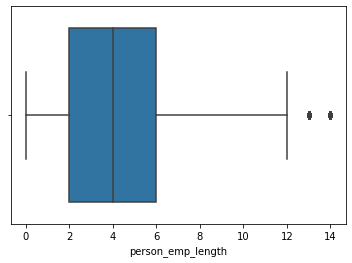

In [14]:
Q1,Q2,Q3 =tuple(credit_risk_scoring.person_emp_length.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=credit_risk_scoring[(credit_risk_scoring.person_emp_length>UL)].index
credit_risk_scoring=credit_risk_scoring.drop(drop_index,axis=0)
sns.boxplot(data=credit_risk_scoring,x='person_emp_length');

5000.0 8000.0 12000.0
7000.0
22500.0
-5500.0


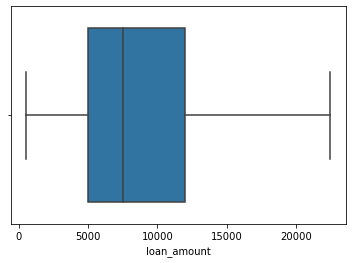

In [15]:
Q1,Q2,Q3 =tuple(credit_risk_scoring.loan_amount.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=credit_risk_scoring[(credit_risk_scoring.loan_amount>UL)].index
credit_risk_scoring=credit_risk_scoring.drop(drop_index,axis=0)
sns.boxplot(data=credit_risk_scoring,x='loan_amount');

8.0 10.99 13.06
5.0600000000000005
20.650000000000002
0.40999999999999925


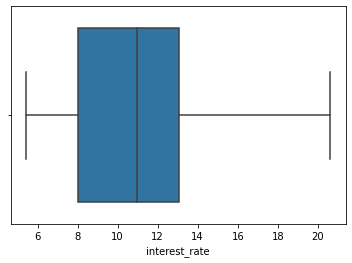

In [16]:
Q1,Q2,Q3 =tuple(credit_risk_scoring.interest_rate.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=credit_risk_scoring[(credit_risk_scoring.interest_rate>UL)].index
credit_risk_scoring=credit_risk_scoring.drop(drop_index,axis=0)
sns.boxplot(data=credit_risk_scoring,x='interest_rate');

0.09 0.15 0.22
0.13
0.41500000000000004
-0.10500000000000001


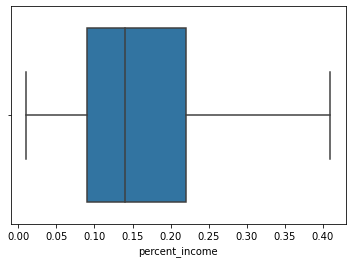

In [17]:
Q1,Q2,Q3 =tuple(credit_risk_scoring.percent_income.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=credit_risk_scoring[(credit_risk_scoring.percent_income>UL)].index
credit_risk_scoring=credit_risk_scoring.drop(drop_index,axis=0)
sns.boxplot(data=credit_risk_scoring,x='percent_income');

3.0 4.0 7.0
4.0
13.0
-3.0


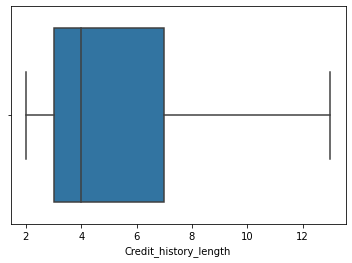

In [18]:
Q1,Q2,Q3 =tuple(credit_risk_scoring.Credit_history_length.quantile(q=[0.25,0.5,0.75]).values)
print(Q1,Q2,Q3)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')


drop_index=credit_risk_scoring[(credit_risk_scoring.Credit_history_length>UL)].index
credit_risk_scoring=credit_risk_scoring.drop(drop_index,axis=0)
sns.boxplot(data=credit_risk_scoring,x='Credit_history_length');

In [19]:
credit_risk_scoring.shape

(26006, 12)

In [20]:
credit_risk_scoring.skew()

person_age               0.976250
person_income            0.734545
person_emp_length        0.686695
loan_amount              0.726399
interest_rate            0.163534
percent_income           0.661673
Credit_history_length    0.927755
loan_status              1.476021
dtype: float64

## (3). Descrivtive stats-

In [21]:
credit_risk_scoring.describe()

,person_age,person_income,person_emp_length,loan_amount,interest_rate,percent_income,Credit_history_length,loan_status
count,26006.000000,26006.000000,26006.000000,26006.000000,26006.000000,26006.000000,26006.000000,26006.000000
mean,26.184996,57461.022572,4.341690,8332.694378,10.911134,0.160167,4.830078,0.203107
std,3.973470,26288.677212,3.320233,4810.389812,3.035923,0.089764,2.709637,0.402319
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.010000,2.000000,0.000000
25%,23.000000,37800.000000,2.000000,4800.000000,8.000000,0.090000,3.000000,0.000000
50%,25.000000,53000.000000,4.000000,7500.000000,10.990000,0.140000,4.000000,0.000000
75%,29.000000,73000.000000,6.000000,11250.000000,13.060000,0.220000,7.000000,0.000000
max,40.000000,139200.000000,14.000000,22500.000000,20.620000,0.410000,13.000000,1.000000


In [22]:
credit_risk_scoring.corr()

,person_age,person_income,person_emp_length,loan_amount,interest_rate,percent_income,Credit_history_length,loan_status
person_age,1.000000,0.090459,0.079110,0.036176,0.008705,-0.032300,0.786431,-0.027619
person_income,0.090459,1.000000,0.194339,0.369167,-0.064698,-0.376087,0.057608,-0.259728
person_emp_length,0.079110,0.194339,1.000000,0.095344,-0.064166,-0.064235,0.075330,-0.089581
loan_amount,0.036176,0.369167,0.095344,1.000000,0.080684,0.630170,0.025096,0.053158
interest_rate,0.008705,-0.064698,-0.064166,0.080684,1.000000,0.105975,0.012965,0.316429
percent_income,-0.032300,-0.376087,-0.064235,0.630170,0.105975,1.000000,-0.018708,0.322006
Credit_history_length,0.786431,0.057608,0.075330,0.025096,0.012965,-0.018708,1.000000,-0.020405
loan_status,-0.027619,-0.259728,-0.089581,0.053158,0.316429,0.322006,-0.020405,1.000000


## (4). Machine learning model problem statement:-

**Bulding a model which can predict the loan_status of each an individual on the basic of their records in the credit_risk_scoring data set.**

  + **Target_variable is--->   `loan_status.`**

In [23]:
credit_risk_scoring.dtypes

person_age                 int64
person_income              int64
person_home_ownership     object
person_emp_length        float64
loan_intent               object
loan_grade                object
loan_amount                int64
interest_rate            float64
percent_income           float64
historical_default        object
Credit_history_length      int64
loan_status                int64
dtype: object

In [24]:
credit_risk_scoring.shape

(26006, 12)

## # Data Prepration:

### (a). Identify the Target Variable and Splitting the Data into Train and Test

In [25]:
# Identifying the input & output/target variable

X = credit_risk_scoring[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade',
                 'loan_amount','interest_rate','percent_income','historical_default','Credit_history_length']]

y = credit_risk_scoring['loan_status']

In [26]:
y.head(10)

1     0
5     1
9     1
19    1
23    0
27    0
29    1
30    1
35    1
41    1
Name: loan_status, dtype: int64

In [27]:
X.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amount,interest_rate,percent_income,historical_default,Credit_history_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0.14,N,3
27,23,11000,OWN,0.0,PERSONAL,A,1400,9.32,0.13,N,3
29,21,11389,OTHER,5.0,EDUCATION,C,4000,12.84,0.35,Y,2
30,21,11520,OWN,5.0,MEDICAL,B,2000,11.12,0.17,N,3
35,21,12000,OWN,5.0,EDUCATION,A,2500,7.51,0.21,N,4
41,24,12000,OWN,4.0,VENTURE,B,2500,12.69,0.21,N,3


### (b). Data-preprocessing

In [28]:
# Data-preprocessing: Train & Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state= 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19504, 11) (19504,)
(6502, 11) (6502,)


### (c). Separating Categorical and Numerical Columns

In [29]:
X_train.head()
X_train.dtypes

person_age                 int64
person_income              int64
person_home_ownership     object
person_emp_length        float64
loan_intent               object
loan_grade                object
loan_amount                int64
interest_rate            float64
percent_income           float64
historical_default        object
Credit_history_length      int64
dtype: object

In [30]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,historical_default
28528,RENT,MEDICAL,B,N
3582,RENT,VENTURE,A,N
18309,RENT,PERSONAL,D,N
8848,MORTGAGE,EDUCATION,A,N
8946,OWN,HOMEIMPROVEMENT,A,N


In [31]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amount,interest_rate,percent_income,Credit_history_length
28528,30,42000,4.0,14750,10.99,0.35,8
3582,23,60000,4.0,3600,7.90,0.06,2
18309,28,90000,12.0,21000,14.54,0.23,9
8848,22,60000,1.0,4800,7.49,0.08,3
8946,25,60000,4.0,6500,6.17,0.11,3


### (d). Scaling the Numerical Features

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),   
                                    columns = X_train_num.columns,        
                                    index = X_train_num.index)

In [33]:
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amount,interest_rate,percent_income,Credit_history_length
28528,0.969904,-0.585053,-0.103802,1.339947,0.019232,2.116041,1.176928
3582,-0.804390,0.100832,-0.103802,-0.978463,-0.995547,-1.111903,-1.045222
18309,0.462963,1.243974,2.305295,2.639504,1.185078,0.780340,1.547287
8848,-1.057860,0.100832,-1.007213,-0.728948,-1.130194,-0.889286,-0.674863
8946,-0.297448,0.100832,-0.103802,-0.375468,-1.563691,-0.555361,-0.674863


In [34]:
X_train_num_rescaled.shape

(19504, 7)

In [35]:
print("(A). Number of Numerical Features:", scaler.n_features_in_)
print("(B). Mean of each column:", scaler.mean_)
print("(C). Std of each column:", np.sqrt(scaler.var_))

(A). Number of Numerical Features: 7
(B). Mean of each column: [2.61735029e+01 5.73538167e+04 4.34469852e+00 8.30575010e+03
 1.09314382e+01 1.59893868e-01 4.82219032e+00]
(C). Std of each column: [3.94523151e+00 2.62434545e+04 3.32074661e+00 4.80933075e+03
 3.04499850e+00 8.98404840e-02 2.70008731e+00]


### (e). Applying LabelEncoding on ordinal Categorical Columns

In [36]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,historical_default
28528,RENT,MEDICAL,B,N
3582,RENT,VENTURE,A,N
18309,RENT,PERSONAL,D,N
8848,MORTGAGE,EDUCATION,A,N
8946,OWN,HOMEIMPROVEMENT,A,N


In [37]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)
X_train_cat_le.head()

""
28528
3582
18309
8848
8946


In [38]:
X_train_cat.loan_grade.unique()

array(['B', 'A', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [39]:
cut_encoder = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F': 6, 'G': 7}

X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,loan_grade
28528,2
3582,1
18309,4
8848,1
8946,1


In [40]:
X_train_cat_le.shape

(19504, 1)

### (e). Applying OneHotEncoding on  nominal Categorical Columns

In [41]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,historical_default
28528,RENT,MEDICAL,B,N
3582,RENT,VENTURE,A,N
18309,RENT,PERSONAL,D,N
8848,MORTGAGE,EDUCATION,A,N
8946,OWN,HOMEIMPROVEMENT,A,N


In [42]:
X_train_cat.drop(['loan_grade'], axis = 1, inplace = True)
X_train_cat.head()

,person_home_ownership,loan_intent,historical_default
28528,RENT,MEDICAL,N
3582,RENT,VENTURE,N
18309,RENT,PERSONAL,N
8848,MORTGAGE,EDUCATION,N
8946,OWN,HOMEIMPROVEMENT,N


In [43]:
X_train_cat['person_home_ownership'].value_counts(normalize= True)

RENT        0.527020
MORTGAGE    0.390330
OWN         0.079573
OTHER       0.003076
Name: person_home_ownership, dtype: float64

In [44]:
X_train_cat['loan_intent'].value_counts(normalize= True)

EDUCATION            0.203753
MEDICAL              0.190217
VENTURE              0.172580
PERSONAL             0.165197
DEBTCONSOLIDATION    0.161557
HOMEIMPROVEMENT      0.106696
Name: loan_intent, dtype: float64

In [45]:
X_train_cat['historical_default'].value_counts(normalize= True)

N    0.828035
Y    0.171965
Name: historical_default, dtype: float64

In [46]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

In [47]:
X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,historical_default_Y
28528,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3582,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18309,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8946,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
encoder_.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [49]:
X_train_cat_ohe.shape

(19504, 9)

### (f).Concatinating the OHE Features and LE Features

In [50]:
X_train_cat = pd.concat([X_train_cat_le, X_train_cat_ohe], axis = 1)

X_train_cat

,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,historical_default_Y
28528,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3582,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18309,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8848,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8946,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14159,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22171,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10647,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11638,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### (f).Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [51]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat], axis=1)

X_train_transformed

,person_age,person_income,person_emp_length,loan_amount,interest_rate,percent_income,Credit_history_length,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,historical_default_Y
28528,0.969904,-0.585053,-0.103802,1.339947,0.019232,2.116041,1.176928,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3582,-0.804390,0.100832,-0.103802,-0.978463,-0.995547,-1.111903,-1.045222,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18309,0.462963,1.243974,2.305295,2.639504,1.185078,0.780340,1.547287,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8848,-1.057860,0.100832,-1.007213,-0.728948,-1.130194,-0.889286,-0.674863,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8946,-0.297448,0.100832,-0.103802,-0.375468,-1.563691,-0.555361,-0.674863,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,-0.804390,1.625022,-1.007213,1.391930,0.019232,-0.110127,-1.045222,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22171,2.237257,-0.165901,-1.007213,0.352284,1.424816,0.335107,0.436212,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10647,-1.057860,0.479974,0.498473,0.300302,1.221203,-0.221435,-1.045222,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11638,-0.804390,0.672403,0.799610,1.807788,0.061925,0.780340,-1.045222,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### (f).Preparing Test Data

In [52]:
X_test.head()
X_test.dtypes

person_age                 int64
person_income              int64
person_home_ownership     object
person_emp_length        float64
loan_intent               object
loan_grade                object
loan_amount                int64
interest_rate            float64
percent_income           float64
historical_default        object
Credit_history_length      int64
dtype: object

In [53]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,historical_default
19483,RENT,VENTURE,B,N
19314,MORTGAGE,MEDICAL,C,Y
23196,RENT,PERSONAL,A,N
18922,RENT,PERSONAL,A,N
4736,MORTGAGE,HOMEIMPROVEMENT,A,N


In [54]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amount,interest_rate,percent_income,Credit_history_length
19483,27,48996,3.0,12000,12.53,0.24,6
19314,31,32000,0.0,2000,13.61,0.06,6
23196,32,16800,0.0,5000,7.29,0.30,9
18922,30,45000,14.0,1900,5.79,0.04,7
4736,23,36000,7.0,10750,10.99,0.30,3


In [55]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amount,interest_rate,percent_income,Credit_history_length
19483,0.209493,-0.318472,-0.404939,0.768142,0.524980,0.891648,0.436212
19314,1.223375,-0.966101,-1.308350,-1.311149,0.879659,-1.111903,0.436212
23196,1.476845,-1.545293,-1.308350,-0.687362,-1.195875,1.559499,1.547287
18922,0.969904,-0.470739,2.907569,-1.331942,-1.688486,-1.334519,0.806570
4736,-0.804390,-0.813682,0.799610,0.508231,0.019232,1.559499,-0.674863


In [56]:
X_test_num_rescaled.shape

(6502, 7)

### Applying LabelEncoding on ordinal Categorical Columns

In [57]:
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,historical_default
19483,RENT,VENTURE,B,N
19314,MORTGAGE,MEDICAL,C,Y
23196,RENT,PERSONAL,A,N
18922,RENT,PERSONAL,A,N
4736,MORTGAGE,HOMEIMPROVEMENT,A,N


In [58]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
19483
19314
23196
18922
4736


In [59]:
X_test_cat.loan_grade.unique()

array(['B', 'C', 'A', 'D', 'F', 'E', 'G'], dtype=object)

In [60]:
X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,loan_grade
28528,2
3582,1
18309,4
8848,1
8946,1


In [61]:
X_test_cat_le.shape

(6502, 1)

###  Applying OneHotEncoding on nominal Categorical Columns

In [62]:
X_test_cat.drop(['loan_grade'], axis = 1, inplace = True)
X_test_cat.head()

,person_home_ownership,loan_intent,historical_default
19483,RENT,VENTURE,N
19314,MORTGAGE,MEDICAL,Y
23196,RENT,PERSONAL,N
18922,RENT,PERSONAL,N
4736,MORTGAGE,HOMEIMPROVEMENT,N


In [63]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

In [64]:
X_test_cat_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,historical_default_Y
19483,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19314,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23196,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18922,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
20453,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9883,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3573,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### .Concatinating the OHE Features and LE Features

In [67]:
X_test_cat = pd.concat([X_test_cat_le, X_test_cat_ohe], axis = 1)

X_test_cat

,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,historical_default_Y
19483,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19314,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23196,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18922,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4736,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20453,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9883,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3573,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### .Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [68]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis=1)

X_test_transformed

,person_age,person_income,person_emp_length,loan_amount,interest_rate,percent_income,Credit_history_length,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,historical_default_Y
19483,0.209493,-0.318472,-0.404939,0.768142,0.524980,0.891648,0.436212,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19314,1.223375,-0.966101,-1.308350,-1.311149,0.879659,-1.111903,0.436212,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23196,1.476845,-1.545293,-1.308350,-0.687362,-1.195875,1.559499,1.547287,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18922,0.969904,-0.470739,2.907569,-1.331942,-1.688486,-1.334519,0.806570,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4736,-0.804390,-0.813682,0.799610,0.508231,0.019232,1.559499,-0.674863,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20453,0.209493,-0.661263,-0.103802,-0.999255,-0.427402,-0.777977,1.547287,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9883,-0.043978,-0.508844,-0.103802,0.144355,0.019232,0.446415,-1.045222,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,-1.311331,-0.508691,-0.706076,-0.271503,0.173584,0.001181,-1.045222,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3573,-0.297448,-0.230679,1.401884,-0.978463,-1.130194,-1.000594,-0.674863,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## # Buldinig model by using algorithims`

### (a). KNN

In [69]:
%%time
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 281 ms
Wall time: 2.6 s


KNeighborsClassifier()

In [70]:
# Prediction
y_test_pred = classifier.predict(X_test_transformed)

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8889572439249461

In [71]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
19483,0,0
19314,0,0
23196,1,1
18922,0,0
4736,1,0
16949,1,1
9902,0,0
9456,0,0
2078,0,0
13591,0,0


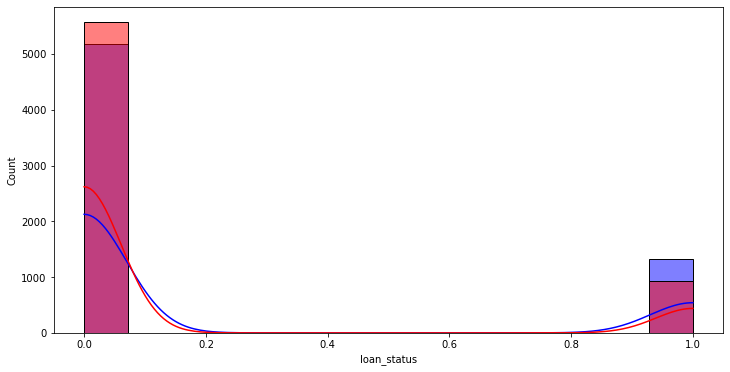

In [72]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

### (b). LogisticRegression

In [73]:
%%time
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 672 ms
Wall time: 999 ms


LogisticRegression()

In [74]:
y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8546601045832052

In [75]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
19483,0,0
19314,0,0
23196,1,0
18922,0,0
4736,1,0
16949,1,1
9902,0,0
9456,0,0
2078,0,0
13591,0,0


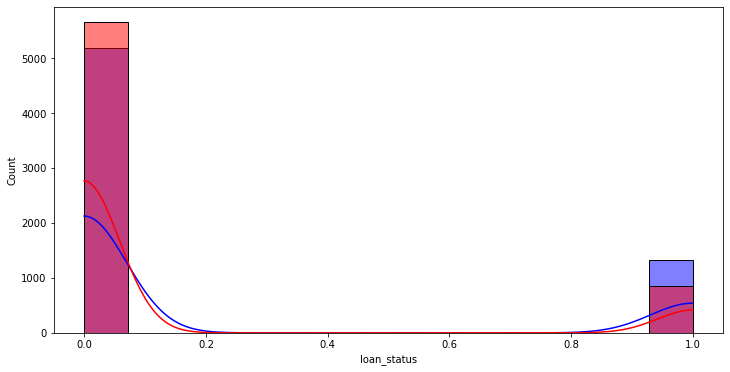

In [76]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

### (c). SVC

In [77]:
%%time
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 12.7 s
Wall time: 13.3 s


SVC()

In [78]:
y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.9071055059981544

In [79]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
19483,0,0
19314,0,0
23196,1,1
18922,0,0
4736,1,0
16949,1,1
9902,0,0
9456,0,0
2078,0,0
13591,0,0


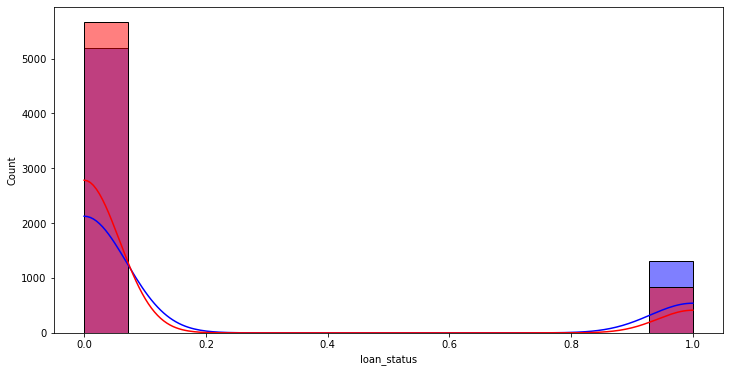

In [80]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

### (d). DecisionTreeClassifier

In [81]:
%%time
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 219 ms
Wall time: 1.34 s


DecisionTreeClassifier()

In [82]:
y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.881267302368502

In [83]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
19483,0,0
19314,0,0
23196,1,1
18922,0,0
4736,1,1
16949,1,1
9902,0,0
9456,0,0
2078,0,0
13591,0,0


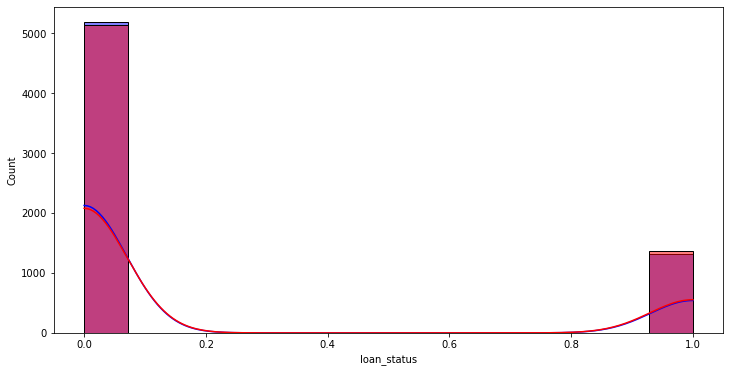

In [84]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

### (e). RandomForestClassifier

In [85]:
%%time
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 3.17 s
Wall time: 5.44 s


RandomForestClassifier()

In [86]:
y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.928791141187327

In [87]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
19483,0,0
19314,0,0
23196,1,1
18922,0,0
4736,1,0
16949,1,1
9902,0,0
9456,0,0
2078,0,0
13591,0,0


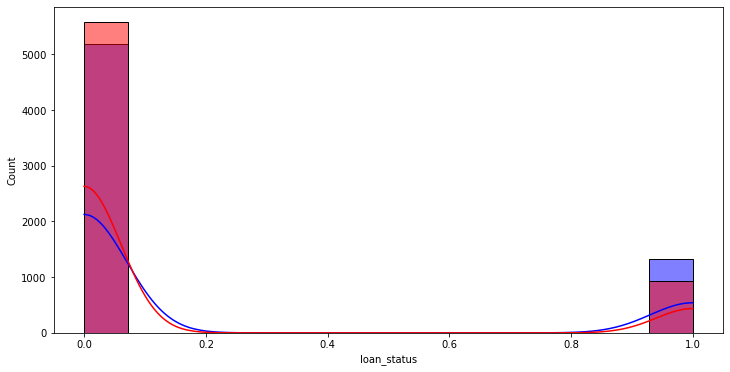

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

### (f). VotingClassifier

In [89]:
%%time
from sklearn.ensemble import VotingClassifier
classifier = VotingClassifier([('lr', classifier), ('rf', classifier), ('r3', classifier)])
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

CPU times: total: 9.23 s
Wall time: 9.35 s


0.9281759458628115

In [90]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
19483,0,0
19314,0,0
23196,1,1
18922,0,0
4736,1,1
16949,1,1
9902,0,0
9456,0,0
2078,0,0
13591,0,0


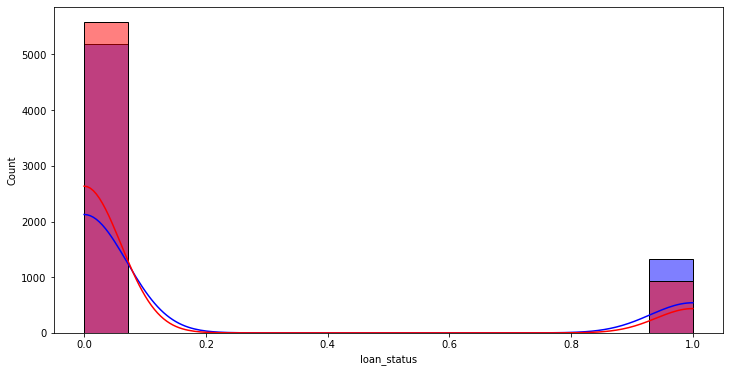

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

### (g).StackingClassifier

In [92]:
%%time
from sklearn.ensemble import StackingClassifier
classifier = StackingClassifier([('lr', classifier), ('rf', classifier), ('r3', classifier)])
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

CPU times: total: 2min 27s
Wall time: 2min 27s


0.9286373423561981

In [93]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
19483,0,0
19314,0,0
23196,1,1
18922,0,0
4736,1,1
16949,1,1
9902,0,0
9456,0,0
2078,0,0
13591,0,0


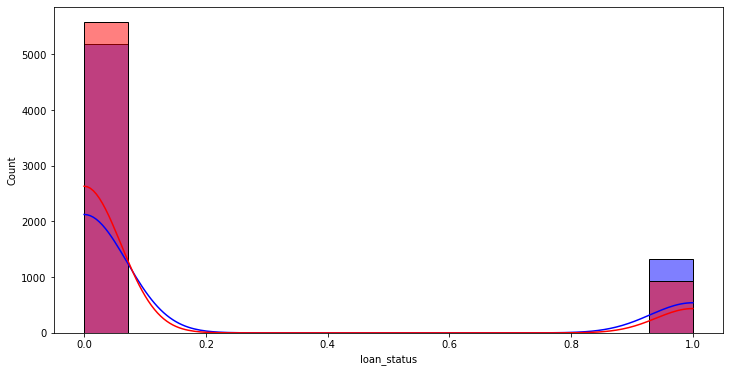

In [94]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

### (h). AdaBoostClassifier

In [95]:
%%time
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 1.14 s
Wall time: 1.35 s


AdaBoostClassifier()

In [96]:
y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8875730544447862

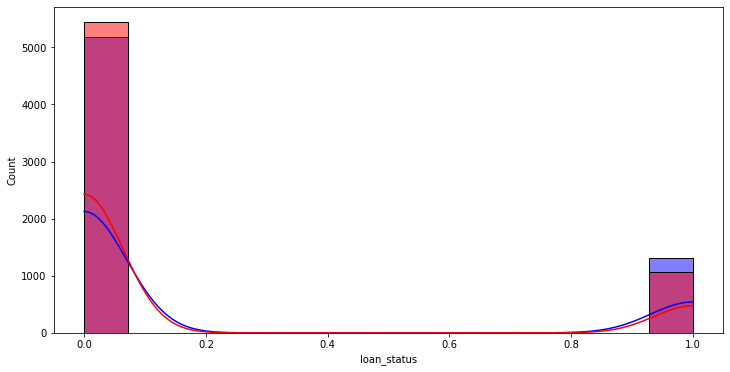

In [97]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

### (i). GradientBoostingClassifier

In [98]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

CPU times: total: 3.39 s
Wall time: 3.62 s


GradientBoostingClassifier()

In [99]:
y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.9223315902799138

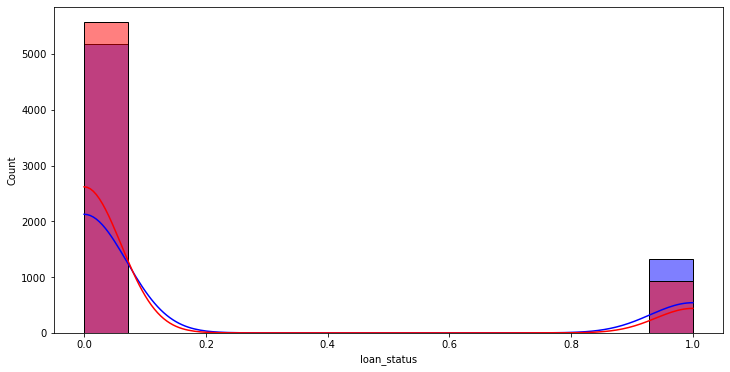

In [100]:
plt.figure(figsize=(12,6))
sns.histplot(y_test, color='blue', alpha=0.5, kde=True)
sns.histplot(y_test_pred, color='red', alpha=0.5, kde=True);

In [101]:
df =  {'Classification_algorithm':['KNN','LogisticRegression ','SVC ','DecisionTreeClassifier','RandomForestClassifier',
                        'VotingClassifier ','StackingClassifier ','AdaBoostClassifier','GradientBoostingClassifier'],
       
      'Accuracy_of_the_classifier(%)': [0.8889, 0.8546, 0.9071, 0.8837, 0.9287, 0.9278, 0.9286, 0.8875, 0.9223]}


Result = pd.DataFrame( df, columns = ['Classification_algorithm','Accuracy_of_the_classifier(%)'])
Result.sort_values(by = 'Accuracy_of_the_classifier(%)', ascending = False)

,Classification_algorithm,Accuracy_of_the_classifier(%)
4,RandomForestClassifier,0.9287
6,StackingClassifier,0.9286
5,VotingClassifier,0.9278
8,GradientBoostingClassifier,0.9223
2,SVC,0.9071
0,KNN,0.8889
7,AdaBoostClassifier,0.8875
3,DecisionTreeClassifier,0.8837
1,LogisticRegression,0.8546


<AxesSubplot:xlabel='Accuracy_of_the_classifier(%)', ylabel='Classification_algorithm'>

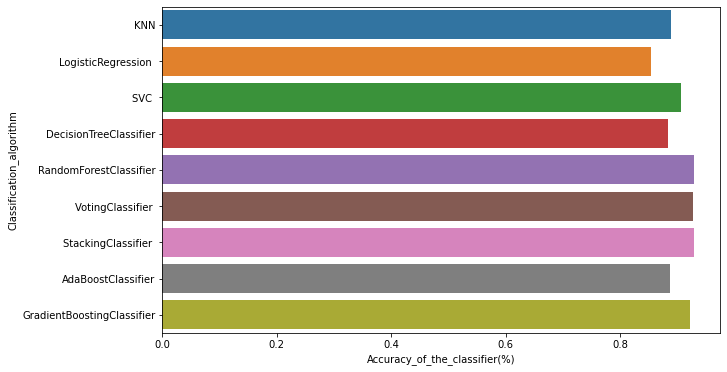

In [102]:
plt.figure(figsize = (10,6))
sns.barplot(y = Result['Classification_algorithm'], x = Result['Accuracy_of_the_classifier(%)'])

##  # Conclusion :

- (1).  We achieved the highest accuracy about **92.87%** for . 
- (2).  Furthermore, came into the conclusion that the best algorithm to predict customers loan is **RandomForestClassifier**.

## # Data visualization based on credit_risk_scoring data set

In [103]:
credit_risk_scoring.dtypes

person_age                 int64
person_income              int64
person_home_ownership     object
person_emp_length        float64
loan_intent               object
loan_grade                object
loan_amount                int64
interest_rate            float64
percent_income           float64
historical_default        object
Credit_history_length      int64
loan_status                int64
dtype: object

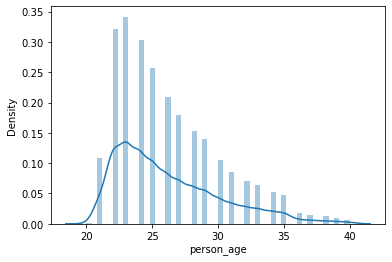

In [104]:
sns.distplot(credit_risk_scoring.person_age);

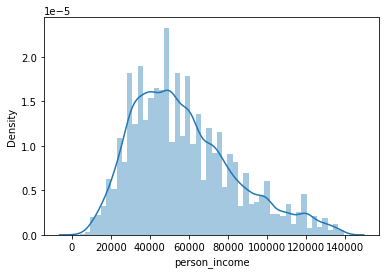

In [105]:
sns.distplot(credit_risk_scoring.person_income);

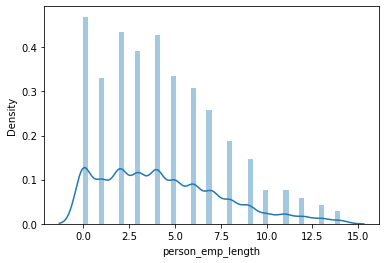

In [106]:
sns.distplot(credit_risk_scoring.person_emp_length);

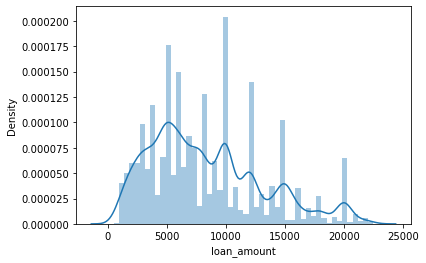

In [107]:
sns.distplot(credit_risk_scoring.loan_amount);

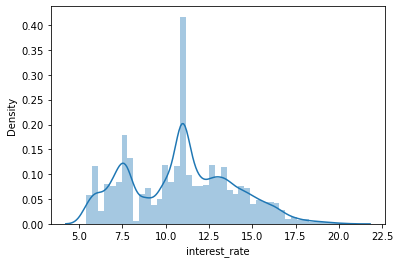

In [108]:
sns.distplot(credit_risk_scoring.interest_rate);

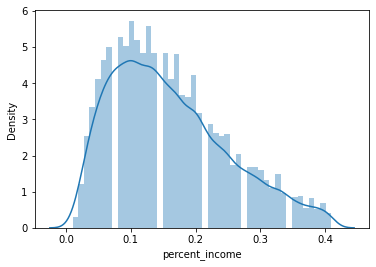

In [109]:
sns.distplot(credit_risk_scoring.percent_income);

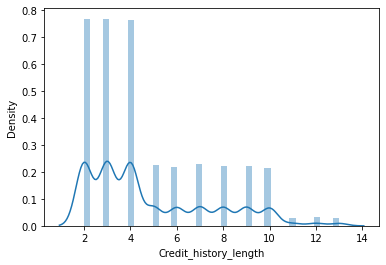

In [110]:
sns.distplot(credit_risk_scoring.Credit_history_length);

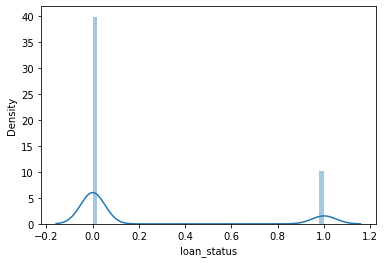

In [111]:
sns.distplot(credit_risk_scoring.loan_status);

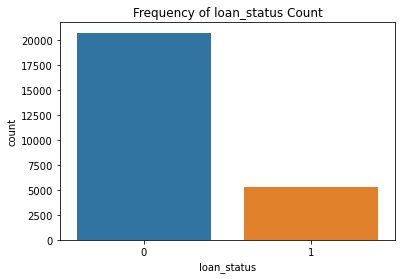

In [112]:
# Count plot
sns.countplot(x='loan_status',data=credit_risk_scoring)
plt.title("Frequency of loan_status Count");

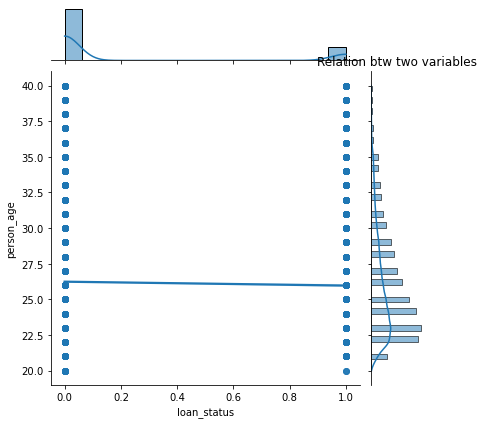

In [113]:
#JointPlot
sns.jointplot(x='loan_status',y='person_age',data=credit_risk_scoring,kind='reg')
plt.title("Relation btw two variables");

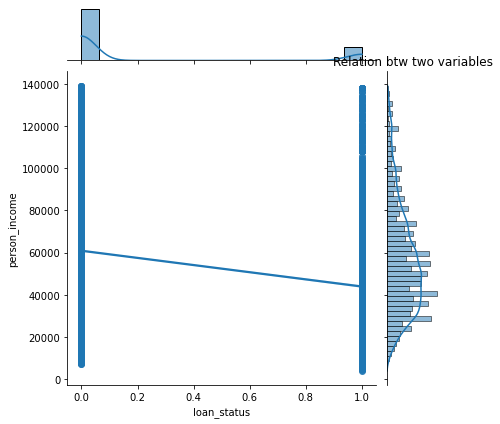

In [114]:
#JointPlot
sns.jointplot(x='loan_status',y='person_income',data=credit_risk_scoring,kind='reg')
plt.title("Relation btw two variables");

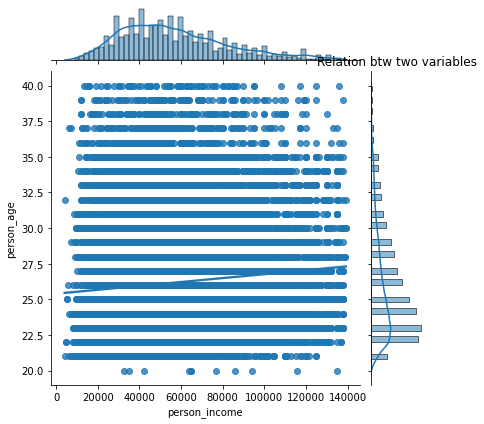

In [115]:
#JointPlot
sns.jointplot(x='person_income',y='person_age',data=credit_risk_scoring,kind='reg')
plt.title("Relation btw two variables");

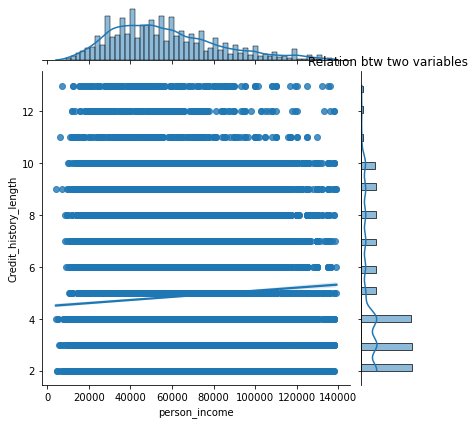

In [116]:
#JointPlot
sns.jointplot(x='person_income',y='Credit_history_length',data=credit_risk_scoring,kind='reg')
plt.title("Relation btw two variables");

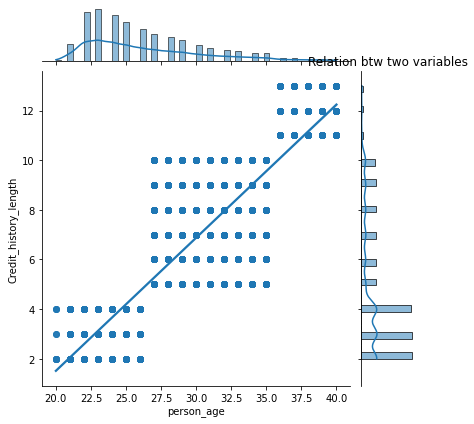

In [117]:
#JointPlot
sns.jointplot(x='person_age',y='Credit_history_length',data=credit_risk_scoring,kind='reg')
plt.title("Relation btw two variables");

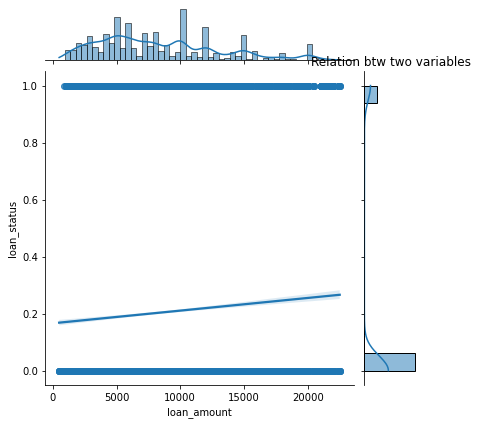

In [118]:
#JointPlot
sns.jointplot(x='loan_amount',y='loan_status',data=credit_risk_scoring,kind='reg')
plt.title("Relation btw two variables");

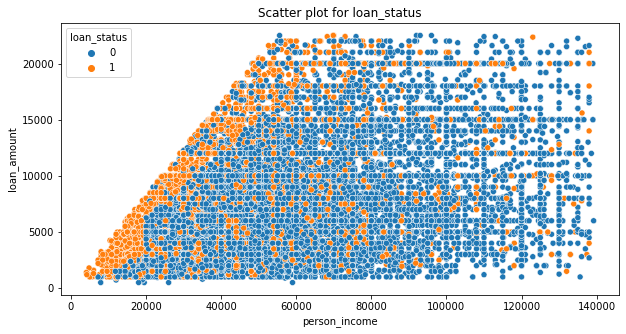

In [119]:
#ScatterPlot
plt.figure(figsize=(10,5))
sns.scatterplot(x='person_income',y='loan_amount',data=credit_risk_scoring,hue='loan_status')
plt.title("Scatter plot for loan_status")
plt.show()

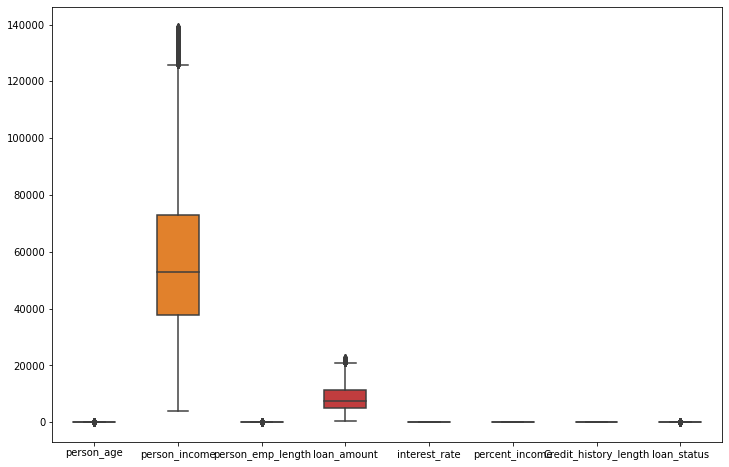

In [120]:
plt.figure(figsize=(12,8))
box_data = credit_risk_scoring #variable representing the data array
box_target = credit_risk_scoring.loan_status #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5);

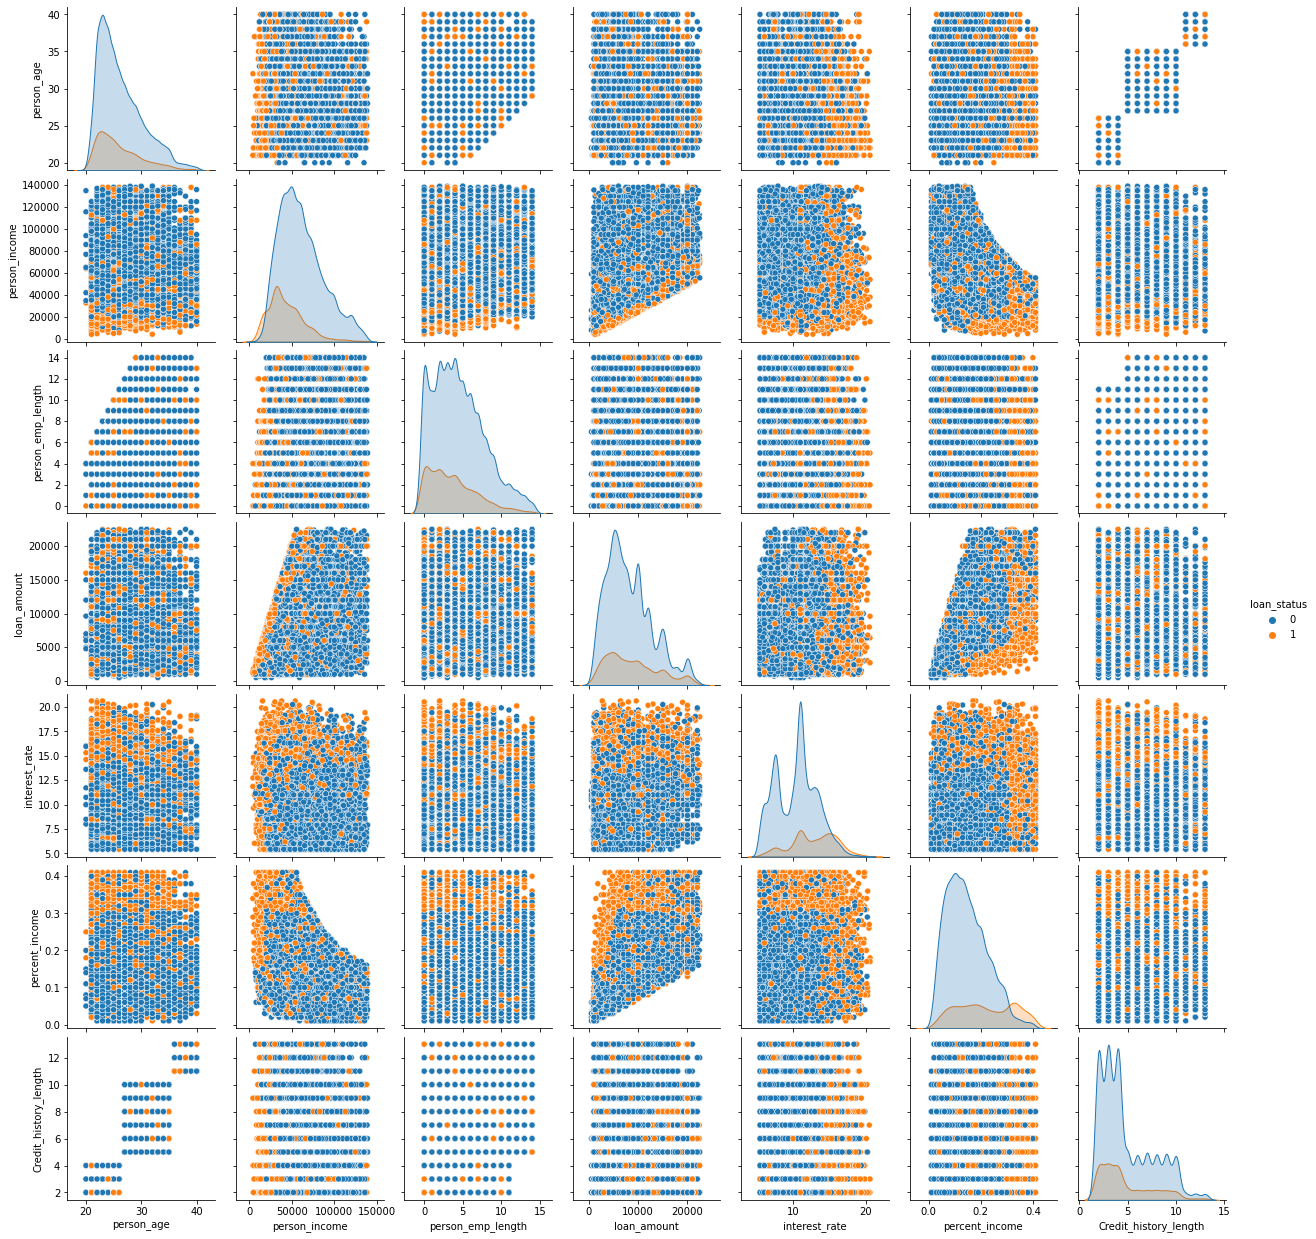

In [121]:
sns.pairplot(credit_risk_scoring,hue='loan_status') #PAIR PLOT IS USED ONLY TO THE FEW NUMERICALS VALUES ARE TO BE ANALYSED
plt.show()

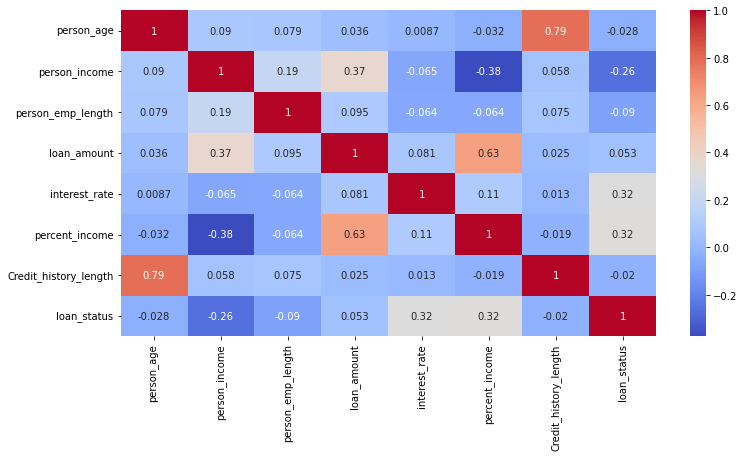

In [122]:
#Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(credit_risk_scoring.corr(),annot=True, cbar=True, cmap='coolwarm');